In [43]:
import math

def endurance(value: list[float]) -> float:
    x, y, z, u, v, w = value
    return math.exp(-2*(y-math.sin(x))**2) + math.sin(z*u) + math.cos(v*w)

In [44]:
import numpy as np

def forward_prop(values: list[float]) -> list[float]:
  endurances = []
  for value in values:
    endurances.append(-endurance(value))
  return endurances

In [45]:
import pyswarms as ps
import numpy as np

options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}

x_max = np.ones(6)
x_min = np.zeros(6)
my_bounds = (x_min, x_max)

optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=6, options=options, bounds=my_bounds)
optimizer.optimize(forward_prop, iters=100)

2023-03-23 11:56:37,092 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=-2.76
2023-03-23 11:56:37,199 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -2.758076662069596, best pos: [0.07594587 0.01006854 0.92196845 0.94795525 0.34058956 0.0576403 ]


(-2.758076662069596,
 array([0.07594587, 0.01006854, 0.92196845, 0.94795525, 0.34058956,
        0.0576403 ]))

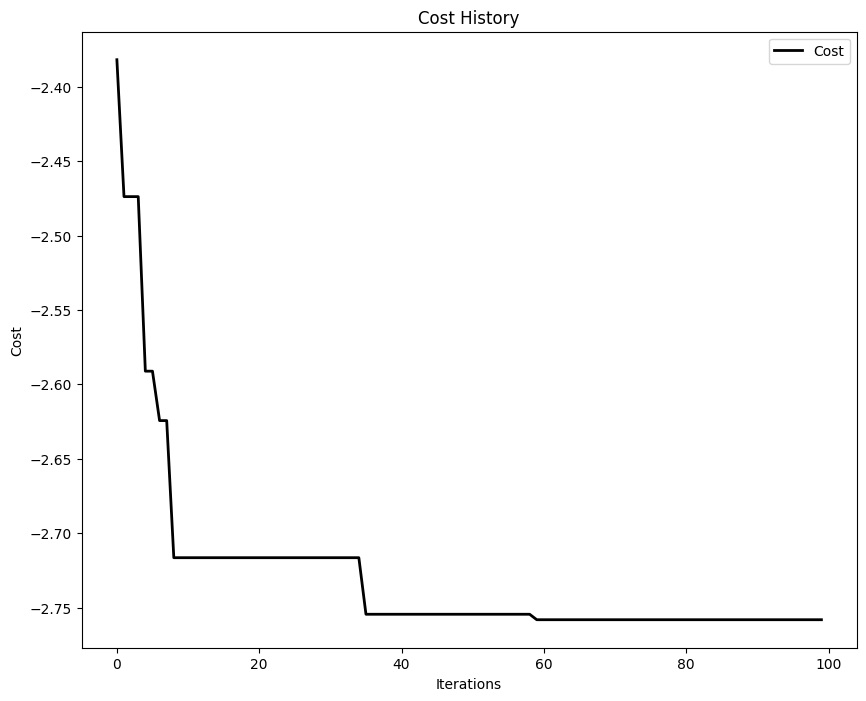

In [46]:
from pyswarms.utils.plotters import plot_cost_history
import matplotlib.pyplot as plt

cost_history = optimizer.cost_history

plot_cost_history(cost_history)
plt.show()